<a href="https://colab.research.google.com/github/YangHamin/ITS-study-IDF-/blob/main/ITSlecture05(%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#타이타닉 DATA 분석 예제 
# 탐색적 데이터 분석 (EDA)== exploratory data Analysis
#- 주어진 데이터를 기술적 통계방법을 이용하여 귀납적으로 분석하는 방법 
#- 선입견 없이 유연하게 데이터를 탐색하여 조사하며, 데이터의 특징과 구조를 파악 
#cf. 확증적 분석 : 가설을 먼저 설정하고 수집한 데이터를 이용해 가설에 대한 평가를 하고 전통적분석기법 

#*데이터 분석 절차
# 데이터 확보및 저장  - 전처리 - 데이터 분석 - 데이터 시각화

# todo 

# 데이터 확보
데이터셋 " 타이타닉 데이터를 "seborn 에 내장된 

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
df=sns.load_dataset('titanic') # df 에 타이타닉
df.head(5)# 앞의 5개정보를 가져와라 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.tail()## 뒷부분의 데이터를 가져옴

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [13]:
df.info() # 기본정보 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [14]:
# object = string 
# category =  분류 

In [16]:
#요약 통계량 확인 
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#문자열 데이터에 대한 요약통계량 확인 
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
#데이터 프레임 매서드 직접사용 통계량 확인

In [20]:
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [31]:
df['age'].count() # 특정데이터 갯수 카운트

714

In [26]:
# 데이터 프레임의 숫자값 데이터 평균
df.mean()

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [28]:
# 조건별 평균 - 성인남성의 연령평균 
condition = (df['adult_male']==True)
df.loc[condition,'age'].mean()

33.17312348668281

In [30]:
#Quiz: fare 를 30이상 40미만 지불한 승객의 평균 나이는 ? 
condition = (df['fare']>=30)&(df['fare']<40)
df.loc[condition,'age'].mean()

28.026785714285715

In [32]:
# 중앙값 : median()
df['age'].median()

28.0

In [33]:
df['age'].sum()

21205.17

In [36]:
#요금에 대한 분산 
# 계산식에 의한 분산 계산 
#요금의 평균 구하기
fare_mean=df['fare'].values.mean() # values = 의미를 좀더 명확하게 하기 위해 적음 
fare_mean

32.204207968574636

In [37]:
#분산공식 구성 : 분산 = ((요금값-평균)**2).sum()/count()-1
my_var = ((df['fare'].values-fare_mean)**2).sum()/(df['fare'].count()-1) 

In [38]:
my_var

2469.436845743116

In [39]:
#분산 메서드 var()
df['fare'].var()

2469.436845743117

In [40]:
# 표준편차 std =분산의 제곱근 =sqrt(분산) : numpy 의 메서드 sqrt()
np.sqrt(df['fare'].var())

49.693428597180905

In [41]:
# 분위 quantile()
# 25% 분위 quantile(0.25)
df['age'].quantile(0.25)

20.125

In [42]:
# 상관관계:corr()
df.corr()['survived']

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

In [43]:
# 상관관계 : 모든 칼럼간의 상관계수 
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


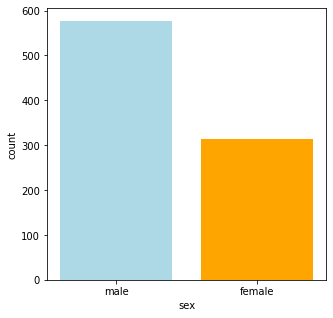

In [47]:
# data visualization : 시각화 
# 남자와 여자 인원수 카운트 하고 성별 인원을 막대차트로 표현 
# 조건생성 , 성인남성 
condition=(df['adult_male']==True) # 성인남성만 
# df.loc[condition,'age'].mean()
condition_male=(df['sex']=='male') # 나이불문한 남성 
condition_female=(df['sex']=='female')#나이불문한 여성 
# 차트를 구성할 데이터 값
gender_category = ['male','female']# x 값
gender_count = [df.loc[condition_male,'sex'].count(),df.loc[condition_female,'sex'].count()] # ex (100명 , 50명) #y 값
# 차트를 그리기 위한 과정 (matplotlib 교재 참조) 
plt.figure(figsize=(5,5))# figure 의 크기

colors=['lightblue','orange']# [남자,여자]

xtick_label_position=list(range(len(gender_category)))# 눈금의 갯수
plt.xticks(xtick_label_position,gender_category)

plt.bar(xtick_label_position,gender_count, color=colors)

plt.xlabel('sex')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


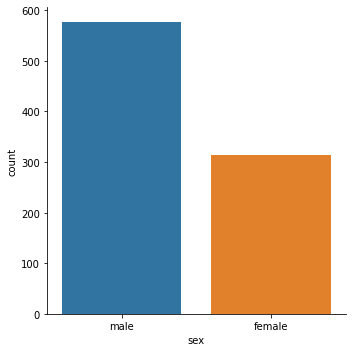

In [48]:
#seaborn visualization 라이브러리 활용한 바차트 그리기
sns.factorplot('sex',data=df,kind='count')